In [1]:
import os
import glob
from PIL import Image
import numpy as np
import torch
from torchvision import transforms
from torch.utils.data import Dataset
from utils import loadFlow, loadImage
import matplotlib.pyplot as plt
from arguments import Args
from flowextension import computeImg

args = Args()
to_tensor = transforms.ToTensor()
to_pilimg = transforms.ToPILImage()

In [2]:
from datasets import FlyingChairsTrain, FlyingChairsTest

In [3]:
flyingchairstrain = FlyingChairsTrain(args)
flyingchairstest = FlyingChairsTest(args)

In [4]:
len(flyingchairstrain)

22232

In [5]:
len(flyingchairstest)

640

In [6]:
def imshow_aug(img1, img2, flow):
    mean = np.array((0.485, 0.456, 0.406))
    std = np.array((0.229, 0.224, 0.225))
    img1_np = img1.cpu().numpy().transpose(1, 2, 0)
    img2_np = img2.cpu().numpy().transpose(1, 2, 0)
    img1_np = img1_np * std + mean
    img2_np = img2_np * std + mean
    flow = flow.cpu().numpy().transpose(1, 2, 0)
    flow_np = computeImg(flow)
    plt.figure()
    plt.imshow(img1_np)
    plt.figure()
    plt.imshow(img2_np)
    plt.figure()
    plt.imshow(flow_np)
    plt.show()

In [7]:
def imshow_make(imageFlowInputs, flowDiffOutput):
    img1 = imageFlowInputs[:3, :, :]
    img2_warp = imageFlowInputs[3:6, :, :]
    flow = flowDiffOutput
    
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    
    img1_np = img1.cpu().numpy().transpose(1, 2, 0)
    img2_wnp = img2_warp.cpu().numpy().transpose(1, 2, 0)
    
    img1_np = img1_np * std + mean
    img2_wnp = img2_wnp * std + mean
    img1_np = np.clip(img1_np, 0, 1)
    img2_wnp = np.clip(img2_wnp, 0, 1)
    
    plt.figure()
    plt.imshow(img1_np)
    
    plt.figure()
    plt.imshow(img2_wnp)
    
    flow = flow.cpu().numpy().transpose(1, 2, 0)
    flow_np = computeImg(flow)
    
    plt.figure()
    plt.imshow(flow_np)
    plt.show()

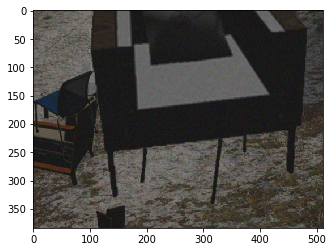

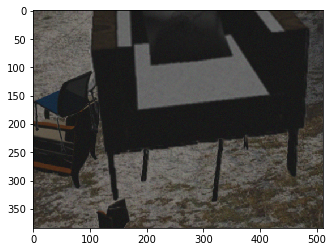

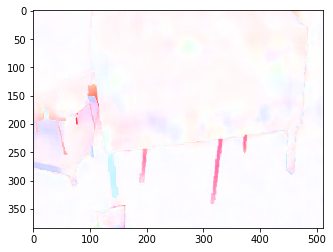

In [8]:
idx = np.random.randint(len(flyingchairstrain))
imageFlowInputs, flowDiffOutput = flyingchairstrain[idx]
imshow_make(imageFlowInputs, flowDiffOutput)

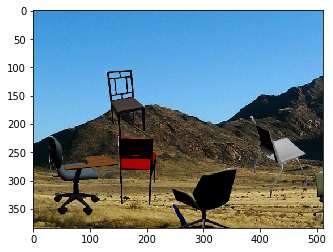

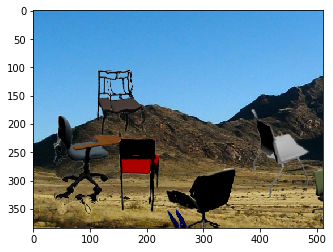

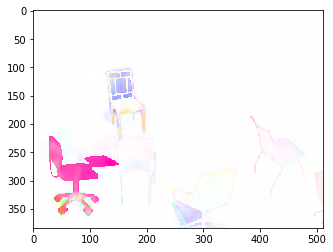

In [9]:
idx = np.random.randint(len(flyingchairstest))
imageFlowInputs, flowDiffOutput = flyingchairstest[idx]
imshow_make(imageFlowInputs, flowDiffOutput)